> About this app. This app helps you see state-level patterns driving CDC's national predicted overdose data.

## How to use this app

This app works best in Chrome or Firefox. You may need to refresh or hit ▶️ Run in the top right corner to wake up the app (~10 seconds). Select a state to see results.

[Data last updated January 10, 2025]

## What the lines mean

Check out our post about these data for background and data collection and smoothing methods.

The 💜 prediction line is the official predicted overdose trend from CDC NVSS provisional overdose data -- you know, the data that media and policymakers use to understand what's happening with overdose trends nationally. The orange 🍊 line is the state's monthly count of final certified overdose deaths, aka the messy "truth." But it takes years for those data to post. We downloaded from WONDER, where they go through 2022 (final) or 2023 (provisional). The blue 💙 line is a yearly line we calculated ourselves by summing the monthly 🍊 "truth" data, a recreation of the official yearly violet 💜 prediction line. 

## About the heatmap

The heatmap below the lines shows 💜 prediction line in shades of purple, the 12-month predicted overdose count. The aqua box is the 12 month window corresponding to the highest overdose month (aqua bar). By comparing the peak month (aqua) to the orange line, you can see get a sense the OD pattern contributing to the predicted peak. Sometimes, the orange peak may not align with the aqua peak month, which we explain here.

<hr>

In [1]:
import pandas as pd

# Load the pickle file as a pandas DataFrame
with open('merged_df.pkl', 'rb') as file:
    merged_df = pd.read_pickle(file)

In [2]:
selected_state = 'Arkansas'

In [3]:
import plotly.graph_objects as go

# Filter merged_df for the selected state's data
graph_data = merged_df[merged_df['State Name'] == selected_state]

# Add hover text with year and month
graph_data = graph_data.copy()  # Prevent SettingWithCopyWarning
graph_data['HoverText'] = graph_data['Date'].dt.strftime('%Y-%B')

# Create the figure
fig = go.Figure()

# Add WONDER Deaths trace
fig.add_trace(go.Scatter(
    x=graph_data['Date'],
    y=graph_data['Deaths'],
    mode='lines',
    name='WONDER Monthly OD Deaths',
    line=dict(color='orange'),
    hovertext=graph_data['HoverText'],
    hoverinfo='text+y',
    yaxis='y1',
    connectgaps=True  # Force display of line even if there is no data
))

# Add Predicted Value trace
fig.add_trace(go.Scatter(
    x=graph_data['Date'],
    y=graph_data['Predicted Value'],
    mode='lines',
    name='12-month Predicted Value',
    line=dict(color='blueviolet'),
    hovertext=graph_data['HoverText'],
    hoverinfo='text+y',
    yaxis='y2',
    connectgaps=True  # Force display of line even if there is no data
))

# Add recreated12m trace
fig.add_trace(go.Scatter(
    x=graph_data['Date'],
    y=graph_data['recreated12m'],
    mode='lines',
    name='Recreated 12-month Cumulative',
    line=dict(color='cornflowerblue'),
    hovertext=graph_data['HoverText'],
    hoverinfo='text+y',
    yaxis='y2',
    connectgaps=True  # Force display of line even if there is no data
))

# Update layout with two y-axes
fig.update_layout(
    title=f'WONDER OD Deaths vs 12-month Predicted Value for {selected_state}',
    yaxis=dict(
        title='WONDER Monthly OD Deaths',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        side='left'
    ),
    yaxis2=dict(
        title='12-month Predicted (violet) and Recreated (blue)',
        titlefont=dict(color='cornflowerblue'),
        tickfont=dict(color='blueviolet'),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=0.5, y=1.1, visible=True, orientation="h", xanchor="center"  # Place the legend above the chart
    ),
    template='plotly_white',
    hovermode='x',
    xaxis=dict(
        title='Date',
        range=['2018-01-01', '2024-12-31']  # Include complete range for 2018 through 2024
    )
)

fig.show()

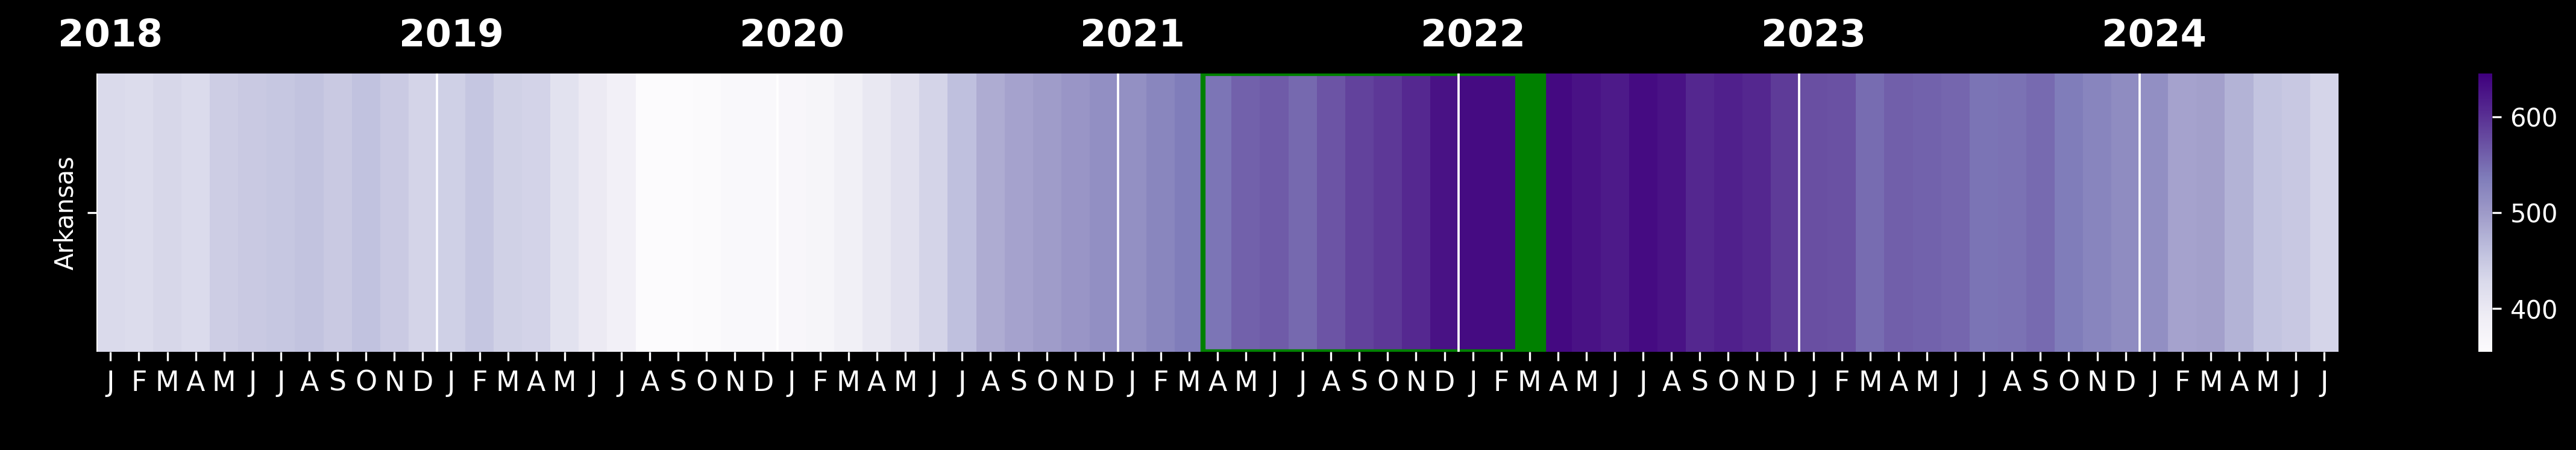

In [4]:
import IPython.display as display
from IPython.display import Image

# Display the .png /work/heatmaps from State Name
display.Image("heatmaps/" + selected_state + ".png")

Notes

January 2023 onwards are provisional and/or partial data from WONDER.

Recreated data using monthly finalized WONDER counts from 2018 to 2022, and unadjusted provisional in 2023.

Orange and blue line data are for all New York state. Purple line data are for New York state minus New York City. Not our fault -- this is just how CDC reports things. Sorry to our friends in NYC! Y'all are exceptional.

<hr>

## Suggested Explorations

- Arizona: When do overdoses spike each year? How does the 12-month NVSS cumulative line respond? 

- Montana: Can you identify data drops? The cumulative WONDER count line does not adjust for these, but NVSS does.

- West Virginia: Two large spikes during COVID restriction era drive much of the early trend.

- Colorado: Peak OD may have been in 2021 (or early 2022), but the second peak in 2023 may be a sustained part of the earlier peak.

- Massachusetts: A massive drop starting in 2023 is predicted to continue into 2024.

- Nevada: Are two high OD months in 2023 driving the direction of the predicted trend for 2024?

<hr>

# Beyond

All data used in the app are public sources. This app was built by Nabarun Dasgupta at the University of North Carolina at Chapel Hill in January 2025. This app is not scheduled for regular updates, but can be if y'all find it useful and send us a request (opioiddatalab@unc.edu).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce7d8424-642b-490e-b484-ef63058a2a98' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>